# **Sales Prediction using Python**

Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

## **Import modules**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)
os.getcwd()

'c:\\Users\\sutan\\OneDrive\\Desktop\\Python Project\\Sales_prediction_using_python'

## **Loading the dataset**

In [5]:
dataset=pd.read_csv("Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## **Preprocessing dataset**

In [6]:
dataset=dataset.drop(columns='Unnamed: 0')

In [7]:
# dataset.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
dataset.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [9]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## **Data Analysis**

<Axes: >

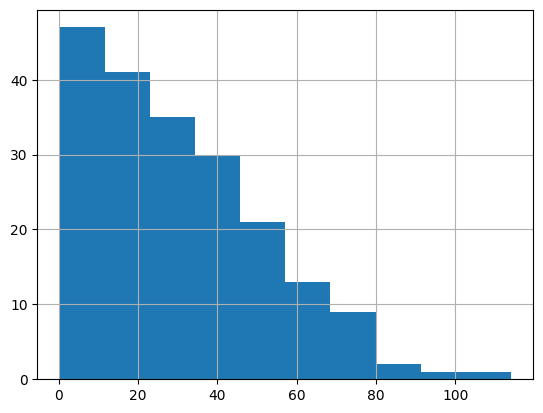

In [11]:
dataset["Newspaper"].hist()

<Axes: >

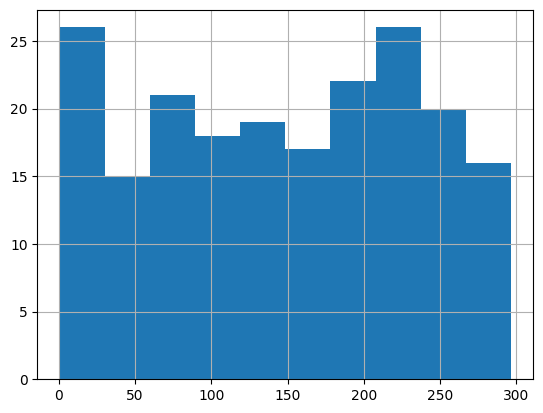

In [12]:
dataset["TV"].hist()

<Axes: >

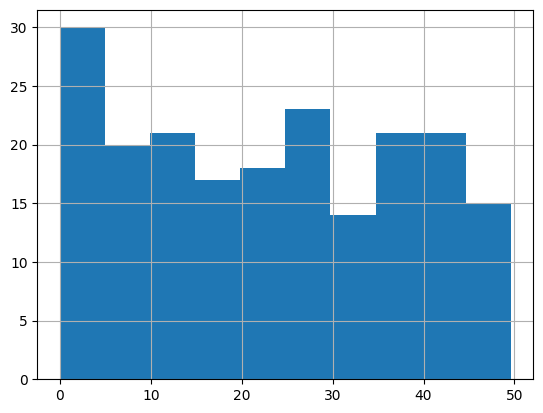

In [13]:
dataset["Radio"].hist()

<Axes: >

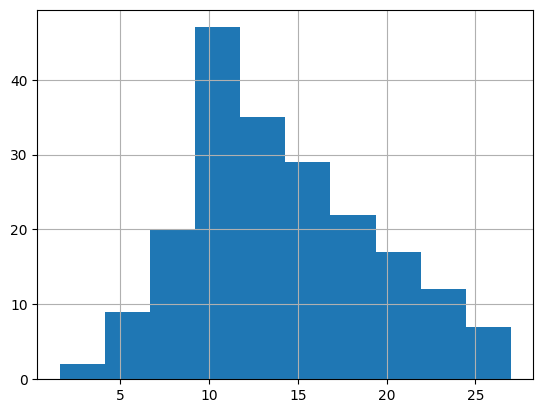

In [14]:
dataset["Sales"].hist()

c:\Users\sutan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


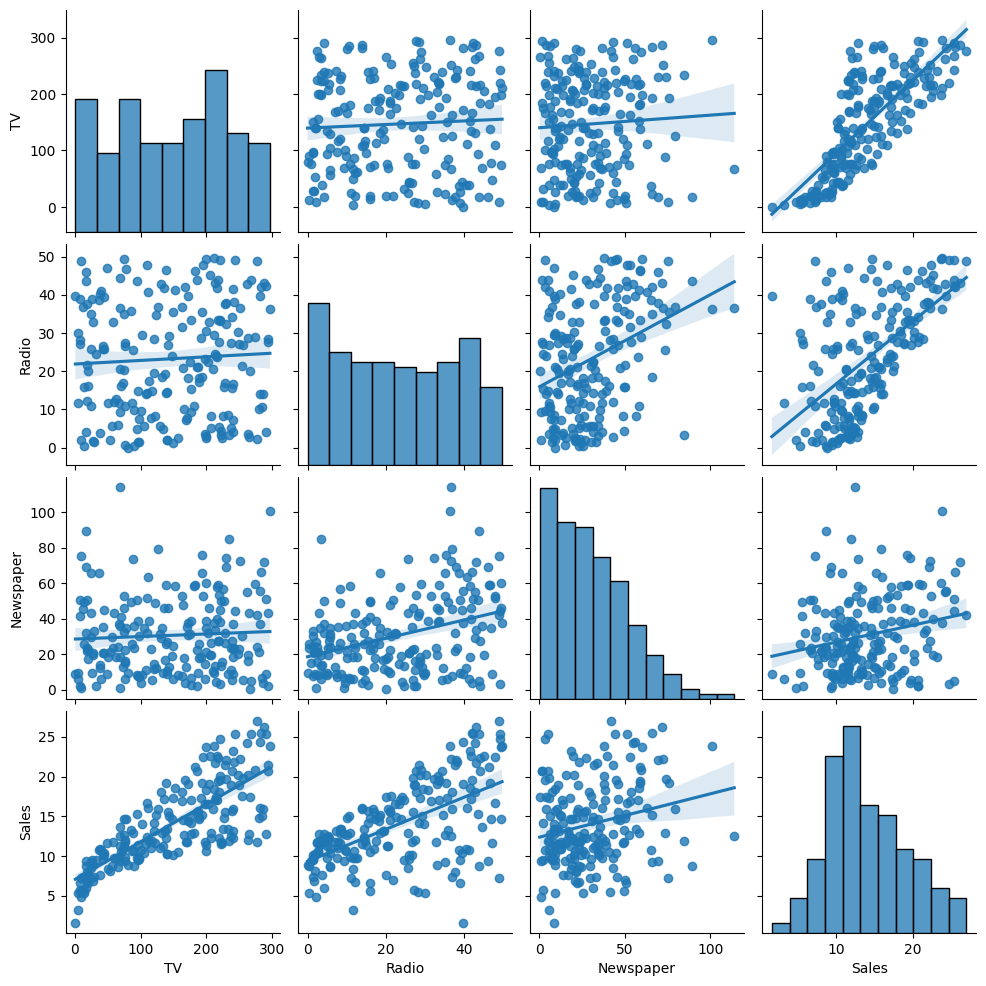

In [15]:
sns.pairplot(dataset,kind="reg")

## **Correlaton Matrix**

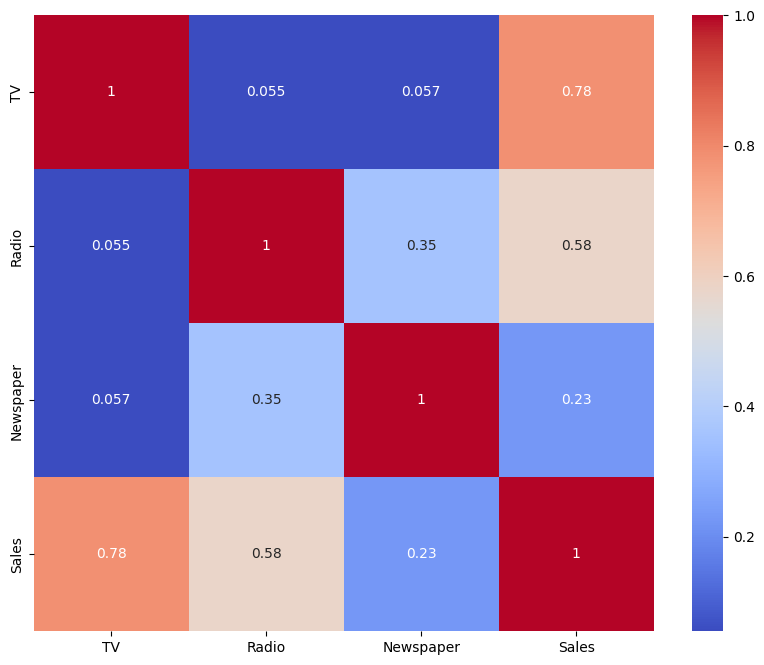

In [16]:
corr = dataset.corr(method='pearson', min_periods=1, numeric_only=1)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

## **Model Training**

In [17]:
X=dataset.drop('Sales', axis=1)
Y=dataset[["Sales"]]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## **Linear Regression**

In [18]:
lin_model=sm.ols(formula="Sales ~ TV+ Radio + Newspaper",data=dataset).fit()

In [19]:
print(lin_model.params,"\n")

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [20]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        14:30:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [21]:
results=[]
names=[]

In [22]:
models=[("LinearRegression",LinearRegression())]

In [32]:
for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    result=np.sqrt(mean_squared_error(y_test,y_pred))
    results.append(result)
    names.append(name)
    print(f"{name} : {result}")

LinearRegression : 1.3456737737404172


## **Makes Prediction on new data**

In [33]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = lin_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: 0    16.915917
dtype: float64
